#  **Phân tích khám phá về bệnh đái tháo đường**

## Bạn đã từng nghe về đái tháo đường chưa? Những yếu tố liên quan nào có thể giúp dự đoán nguy cơ mắc bệnh này? Bộ dữ liệu dưới đây cho phép bạn khám phá mối liên hệ giữa các đặc trưng lâm sàng (ví dụ: đường huyết 2 giờ sau OGTT, BMI, huyết áp tâm trương, số lần mang thai, v.v.) và khả năng hiện diện đái tháo đường qua đó phân tích và khám phá.

## Bộ dữ liệu gốc thuộc National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK, Hoa Kỳ), thu thập trên phụ nữ người Pima (Akimel O’odham) từ 21 tuổi trở lên, sinh sống khu vực Phoenix, Arizona (Hoa Kỳ).

## 1. Định nghĩa vấn đề (Define Problem)
- **Mô tả**:
    - Bộ dữ liệu gốc thuộc National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK, Hoa Kỳ), thu thập trên phụ nữ người Pima (Akimel O’odham) từ 21 tuổi trở lên, sinh sống khu vực Phoenix, Arizona (Hoa Kỳ).
+ **Dữ liệu vào**:
    + Pregnancies – số lần mang thai
    + Glucose – đường huyết 2h/hoặc đo glucose (mg/dL)
    + BloodPressure – huyết áp tâm trương (mmHg)
    + SkinThickness – bề dày da tam đầu (mm)
    + Insulin – insulin huyết tương 2h (mu U/mL)
    + BMI – chỉ số khối cơ thể (kg/m²)
    + DiabetesPedigreeFunction – chỉ số phả hệ (nguy cơ di truyền)
    + Age – tuổi (năm)
+ **Kết quả**: Outcome (0,1)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [1]:
# Importing all import python libraries
import pandas as pd
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2. Nạp dữ liệu (Load Dataset)

In [44]:
names = [
    "Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"
]

pima_df = pd.read_csv("../Lab3/dataset/pima-indians-diabetes.csv", header=None, names=names)
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [45]:
# shape
print(f'+ Shape: {pima_df.shape}')
# types
print(f'+ Data Types: \n{pima_df.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(pima_df.head(5))
display.display(pima_df.tail(5))
# info
pima_df.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Dữ liệu có 8 tính chất để phân lớp: Pregnancies, Glucose(mg/dL), BloodPressure(mmHg), SkinThickness(mm), Insulin(U/mL), BMI(kg/m²), DiabetesPedigreeFunction, Age
+ Tổng số dòng dữ liệu là 768 dòng
+ Dữ liệu để phân lớp ở cột Outcome

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [46]:
has_null = pima_df.isnull().sum().any()
has_nan  = pima_df.isna().sum().any()
n_duplicated = pima_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(pima_df[pima_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(pima_df[pima_df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không bị trùng và không có giá trị rỗng (NaN, Null)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [47]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Nhận xét**:
+ Các tính chất Glucose, BloodPressure, SkinThickness, Insulin, BMI xuất hiện giá trị 0 bất thường.

In [48]:
#Bool_expression
# Int_expression

(pima_df["Outcome"] == 0).sum()
#bool_expression = (pima_df["Outcome"] = 1)
#pima_df.loc(bool_expression).describe()

500

In [49]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
zero_count = (pima_df[cols] == 0).sum()
zero_pre = zero_count.div(len(pima_df)).mul(100).round(2)
report = pd.DataFrame({"zero_count": zero_count, "zero_pct": zero_pre})
print(report)


               zero_count  zero_pct
Glucose                 5      0.65
BloodPressure          35      4.56
SkinThickness         227     29.56
Insulin               374     48.70
BMI                    11      1.43


**Nhận xét:**

- Với các cột chiếm tỷ lệ cao, sẽ thay 0 thành NaN

In [7]:
# Replace 0 -> NaN
cols_hight_pct = ["SkinThickness","Insulin"]
pima_df[cols_hight_pct] = (pima_df[cols_hight_pct].replace(0, np.nan))

- Với các cột chiếm tỷ lệ thấp, sẽ sử dụng median để thay thế 0.

In [8]:
cols_low_pct = ["Glucose","BloodPressure","BMI"]
pima_df[cols_low_pct] = (pima_df[cols_low_pct].replace(0, np.nan))
pima_df[cols_low_pct].median()

Glucose          117.0
BloodPressure     72.0
BMI               32.3
dtype: float64

In [ ]:
pima_df.describe()  # convert C->R => describe().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Nhận xét:**
- So với trước khi thay 0→NaN, giá trị mean của SkinThickness tăng từ ~20.5 → 29.15 và Insulin từ ~79.8 → 155.55, điều này chứng tỏ số 0 đã kéo lệch trung bình rất mạnh.

In [10]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
zero_count = (pima_df[cols] == 0).sum()
zero_pre = zero_count.div(len(pima_df)).mul(100).round(2)
report = pd.DataFrame({"zero_count": zero_count, "zero_pct": zero_pre})
print(report)

               zero_count  zero_pct
Glucose                 0       0.0
BloodPressure           0       0.0
SkinThickness           0       0.0
Insulin                 0       0.0
BMI                     0       0.0


**Nhận xét:**
- Không còn giá trị 0 phi lâm sàng nữa.

#### (4) **Các giá trị duy nhất ở mỗi cột**

1) Pregnancies

In [11]:
np.sort(pima_df["Pregnancies"].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17],
      dtype=int64)

**Nhận xét:** Pregnancies[0,17] là hợp lý. Tuy nhiên số lần đẻ 17 lần về sinh học có thể coi là đa sản.

2) Glucose

In [12]:
np.sort(pima_df["Glucose"].unique())

array([ 44.,  56.,  57.,  61.,  62.,  65.,  67.,  68.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
       107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
       118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128.,
       129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139.,
       140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150.,
       151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161.,
       162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172.,
       173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183.,
       184., 186., 187., 188., 189., 190., 191., 193., 194., 195., 196.,
       197., 198., 199.,  nan])

**Nhận xét:** Pregnancies[50,200] là hợp lý. Tuy nhiên [0, < 50] có thể nhập sai hoặc thiếu.

3) BloodPressure

In [13]:
np.sort(pima_df["BloodPressure"].unique())

array([ 24.,  30.,  38.,  40.,  44.,  46.,  48.,  50.,  52.,  54.,  55.,
        56.,  58.,  60.,  61.,  62.,  64.,  65.,  66.,  68.,  70.,  72.,
        74.,  75.,  76.,  78.,  80.,  82.,  84.,  85.,  86.,  88.,  90.,
        92.,  94.,  95.,  96.,  98., 100., 102., 104., 106., 108., 110.,
       114., 122.,  nan])

**Nhận xét:** BloodPressure[40,120] là hợp lý. Tuy nhiên <40 hoặc >120 cần kiểm tra.

4) SkinThickness

In [14]:
np.sort(pima_df["SkinThickness"].unique())

array([ 7.,  8., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.,
       21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 54., 56., 60., 63., 99., nan])

**Nhận xét:** SkinThickness[10,30] là hợp lý. Tuy nhiên <40 hoặc >120 cần kiểm tra.

5) Insulin

In [15]:
np.sort(pima_df["Insulin"].unique())

array([ 14.,  15.,  16.,  18.,  22.,  23.,  25.,  29.,  32.,  36.,  37.,
        38.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        63.,  64.,  65.,  66.,  67.,  68.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  77.,  78.,  79.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  94.,  95.,  96.,  99., 100.,
       105., 106., 108., 110., 112., 114., 115., 116., 119., 120., 122.,
       125., 126., 127., 128., 129., 130., 132., 135., 140., 142., 144.,
       145., 146., 148., 150., 152., 155., 156., 158., 159., 160., 165.,
       166., 167., 168., 170., 171., 175., 176., 178., 180., 182., 183.,
       184., 185., 188., 190., 191., 192., 193., 194., 196., 200., 204.,
       205., 207., 210., 215., 220., 225., 228., 230., 231., 235., 237.,
       240., 245., 249., 250., 255., 258., 265., 270., 271., 272., 274.,
       275., 277., 278., 280., 284., 285., 291., 29

**Nhận xét:** Insulin[2,300] là hợp lý. Tuy nhiên các giá trị >300-400 có thể ca bệnh kháng Insulin nặng, đối với giá trị > 500 chắc chắn là outlier hoặc lỗi khi nhập dữ liệu.

6) BMI

In [16]:
np.sort(pima_df["BMI"].unique())

array([18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1, 20.4,
       20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3, 22.4,
       22.5, 22.6, 22.7, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5, 23.6,
       23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7,
       24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8, 25.9,
       26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. ,
       27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1,
       28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.2, 29.3,
       29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5,
       30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. , 32.1,
       32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3,
       33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4, 34.5,
       34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.6,
       35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36.3, 36

**Nhận xét:** SkinThickness[12,60] là hợp lý. Tuy nhiên >60 có thể outlier hoặc trường hợp dặc biệt

7) DiabetesPedigreeFunction

In [17]:
np.sort(pima_df["DiabetesPedigreeFunction"].unique())

array([0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1  , 0.101,
       0.102, 0.107, 0.108, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.133, 0.134, 0.135, 0.136, 0.137,
       0.138, 0.14 , 0.141, 0.142, 0.143, 0.144, 0.145, 0.147, 0.148,
       0.149, 0.15 , 0.151, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158,
       0.159, 0.16 , 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167,
       0.17 , 0.171, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179,
       0.18 , 0.181, 0.182, 0.183, 0.186, 0.187, 0.188, 0.189, 0.19 ,
       0.191, 0.192, 0.194, 0.196, 0.197, 0.198, 0.199, 0.2  , 0.201,
       0.203, 0.204, 0.205, 0.206, 0.207, 0.209, 0.21 , 0.212, 0.215,
       0.217, 0.218, 0.219, 0.22 , 0.221, 0.222, 0.223, 0.225, 0.226,
       0.227, 0.229, 0.23 , 0.231, 0.232, 0.233, 0.234, 0.235, 0.236,
       0.237, 0.238, 0.239, 0.24 , 0.241, 0.243, 0.244, 0.245, 0.246,
       0.247, 0.248, 0.249, 0.251, 0.252, 0.253, 0.254, 0.255, 0.256,
       0.257, 0.258,

**Nhận xét:** Dữ liệu tính toán theo pedigree function có giá trị trong mức hợp lý.

8) Age

In [18]:
np.sort(pima_df["Age"].unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81], dtype=int64)

**Nhận xét:** 
- Do bộ tài liệu được đo bởi những phụ nữ >21 cho nên không có điểm bất thường.
- Ngoài ra theo ràng buộc thiết kế mẫu của nghiên cứu NIDDK cho rằng chọn một nhóm phụ nữ >=21 đảm bảo đủ các chỉ số (BMI, huyết áp,...) ổn định, dễ so sánh. Ngoài ra tránh vấn đề đạo đức/đồng thuận ở vị thành niên.

#### (5) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

In [19]:
pima_df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:
-	Dữ liệu phục vụ bài toán phân loại nhị phân (mắc/không mắc đái tháo đường).
-	Phân bố lớp mất cân bằng, trong đó nhóm không mắc chiếm tỷ trọng lớn khoảng gấp đôi nhóm mắc.


### 1. **Mối tương quan giữa các tính chất (Correlations)**

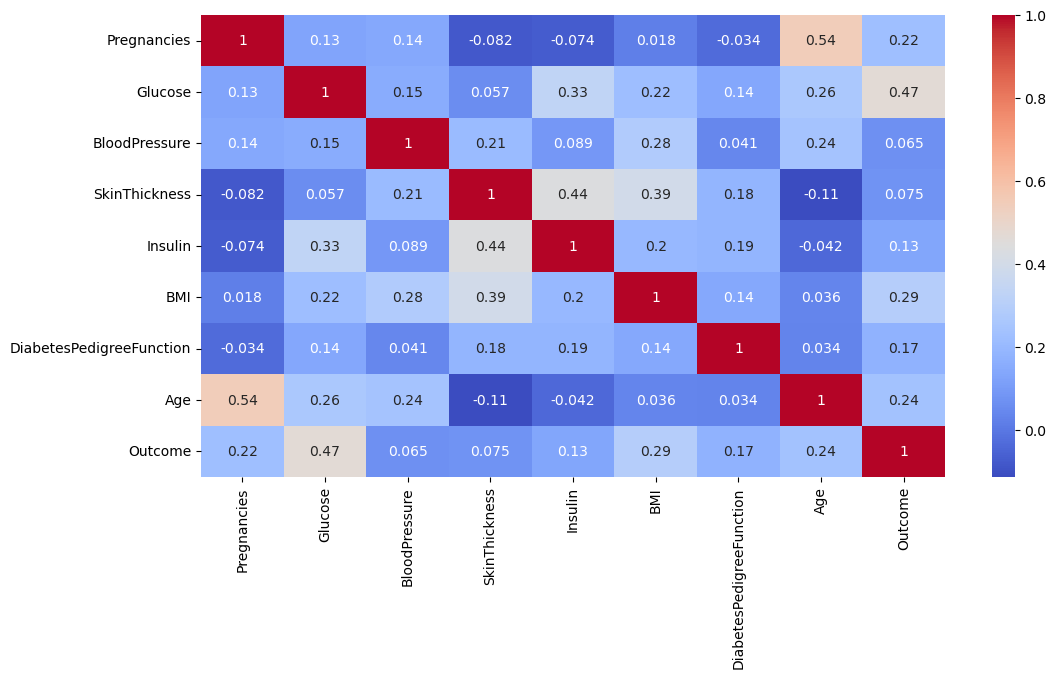

In [50]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(pima_df.corr(), annot= True, cmap="coolwarm")
plt.show() 

**Nhận xét:**
- Glucose tương quan cao với Outcome. Cho thấy biến này có ảnh hưởng đối với căn bệnh.
- Ngoài ra còn Insulin và BMI cũng khá tương quan với Outcome.

### **2. Hiển thị dữ liệu (Visualize Data)**

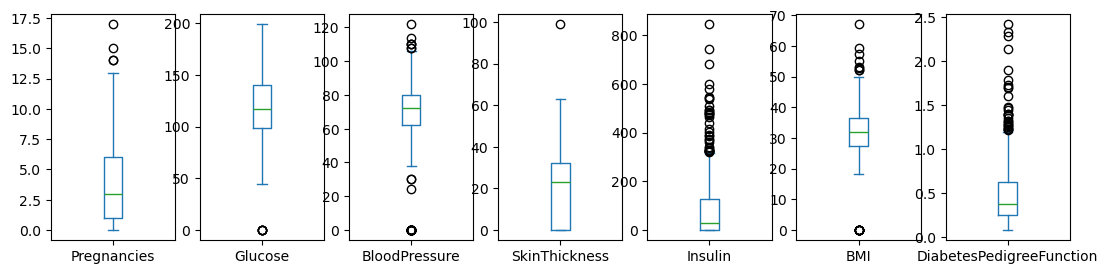

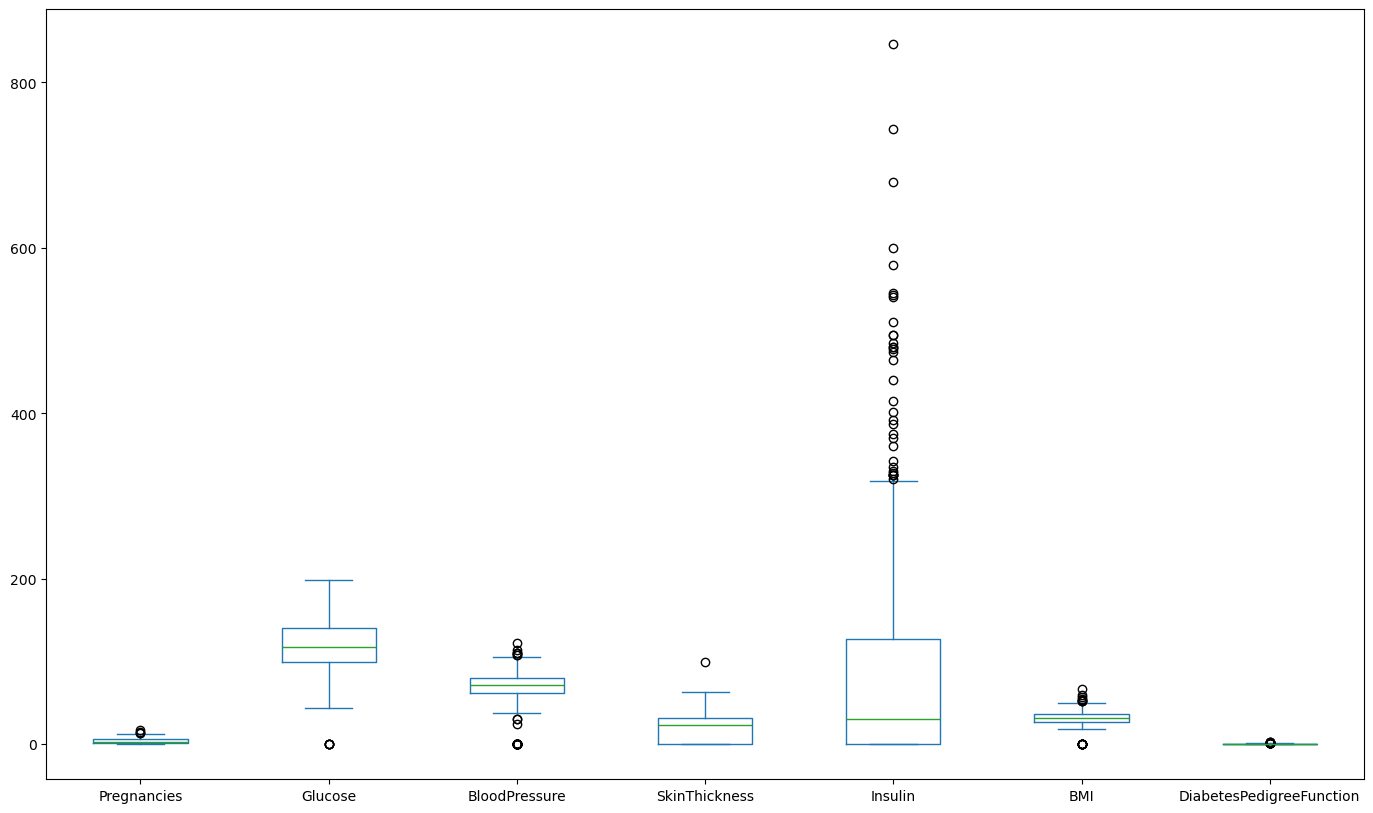

In [55]:
cols_f = pima_df.iloc[:, :7]
cols_f.plot(kind="box", subplots=True, layout=(3, 9), sharex=False, sharey=False, figsize=(17,10))
cols_f.plot(kind="box", figsize=(17,10))
plt.savefig("abc.pdf")

**Nhận xét:**
- Độ trải rộng giữa các tính chất khác nhau hoàn toàn.
- Độ lệch đa số sẽ phân phối lệch phải và theo hướng giá trị lớn.
- Phân bố giá trị của Glucose cân bằng.

**Biểu đồ Histogram**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>, <Axes: >,
        <Axes: >]], dtype=object)

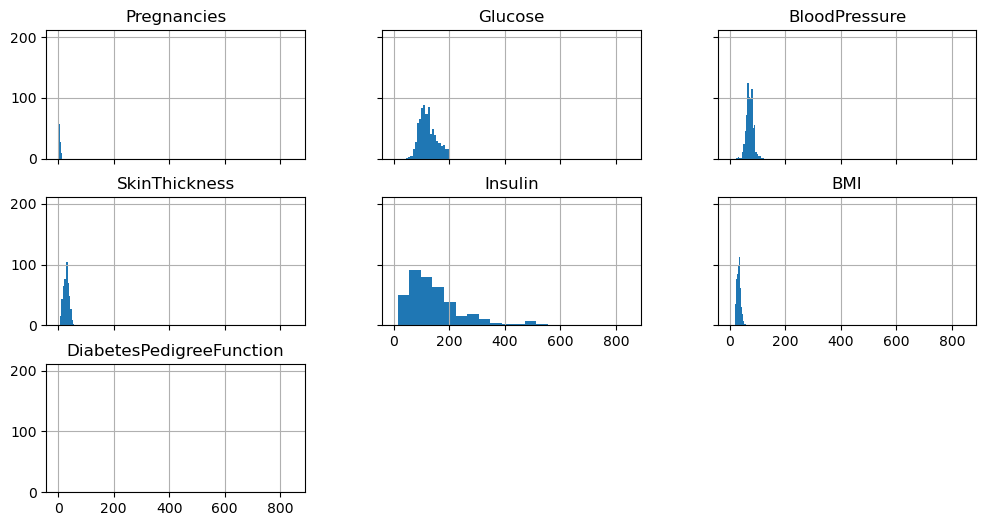

In [22]:
cols_f.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True)

**Nhận xét:**
- Hình dạng phân phối của Insulin có "đuôi" dài tới 800.
- Đối với Glucose, BMI, BloodPresure đơn đỉnh, có chú lệt phải nhẹ.

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel='Glucose', ylabel='BloodPressure'>,
        <Axes: xlabel='BloodPressure', ylabel='BloodPressure'>,


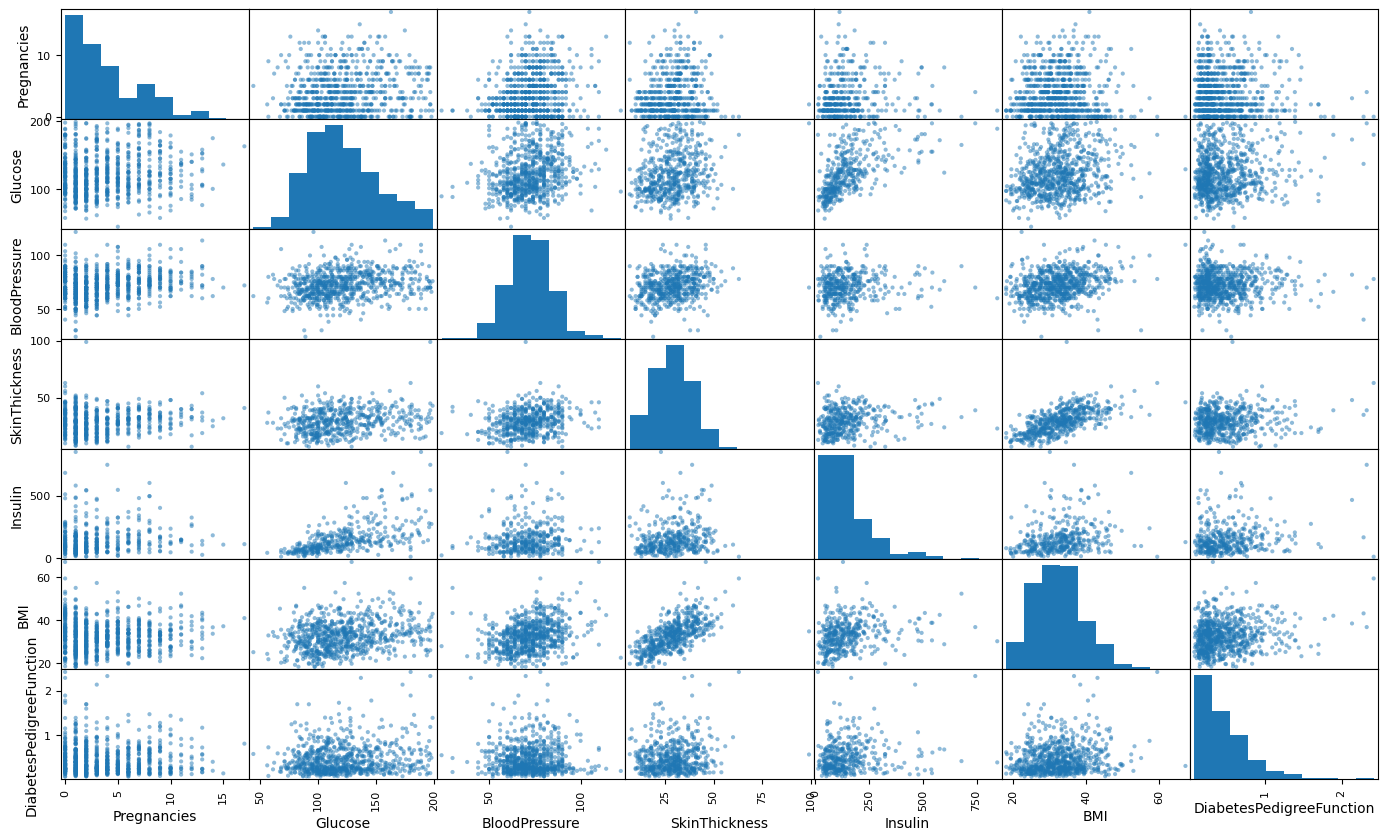

In [23]:
pd.plotting.scatter_matrix(cols_f, figsize=(17,10))

#### (3) Các câu hỏi

1) Các cột nào ảnh hưởng lớn đến tỷ lệ mắc bệnh?

These person correlation with outcome:
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


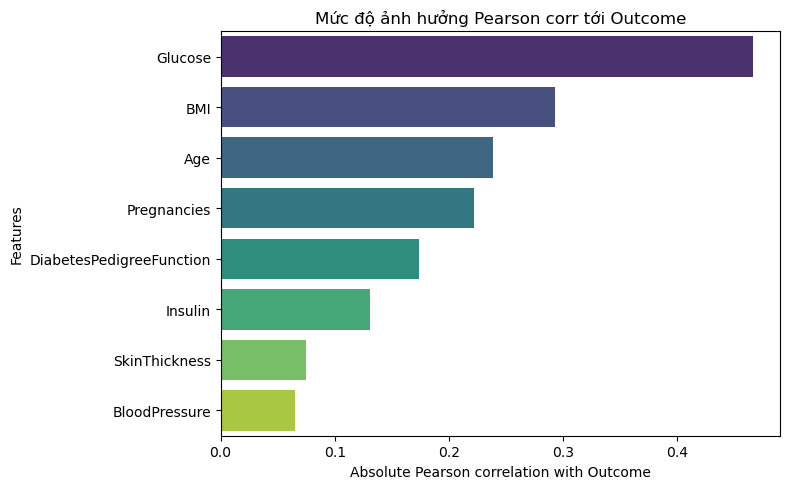

In [52]:
# Cal abs person correlation with outcome
corr_with_outcome = pima_df.corr()['Outcome'].drop('Outcome').sort_values(ascending=False)
# Print the  correlations
print('These person correlation with outcome:')
print(corr_with_outcome)

# chart
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_outcome.values, y=corr_with_outcome.index, hue=corr_with_outcome.index ,palette='viridis')
plt.title('Mức độ ảnh hưởng Pearson corr tới Outcome')
plt.xlabel('Absolute Pearson correlation with Outcome')
plt.ylabel('Features')
plt.xlim(0, corr_with_outcome.max() * 1.05)
plt.tight_layout()
plt.show()


**Nhận xét:**
- Glucose có mỗi tương quan cao nhất trong các features.
- Tiếp sau đó là BMI, Insulin, ...

2) Glucose tăng thì các biến nào sẽ có xu hướng gia tăng, vì sao?

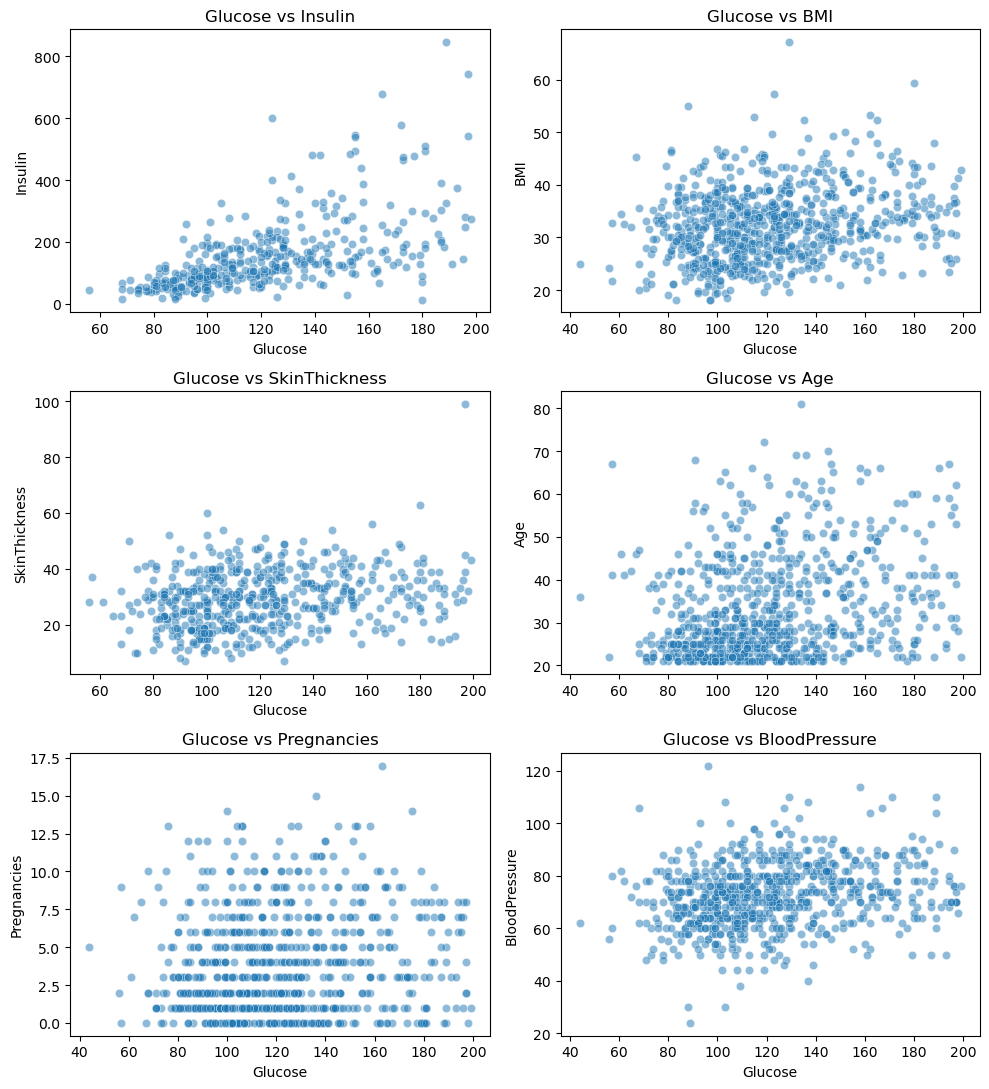

In [25]:
targets = ["Insulin","BMI","SkinThickness","Age","Pregnancies","BloodPressure"]

fig, axes = plt.subplots(3, 2, figsize=(10, 11)) # 2D (r,c)
axes = axes.ravel() # 2d -> 1d (r*c,)
# Target(1d) -> sublot => Calculate r,c (Difficult)

for i, col in enumerate(targets): # enumarate take index
    ax = axes[i]
    d = pima_df[["Glucose", col]]
    sns.scatterplot(data=d, x="Glucose", y=col, ax=ax, alpha=0.5) #When creating multiple plots using 'plt.subplots', you usually pass 'ax' to draw exactly in that cell 

    ax.set_title(f"Glucose vs {col}")

plt.tight_layout(); plt.show()

**Nhận xét:**
- Đa số các biến đều tương quan khá mạnh với Glucose. Điều này càng làm rõ tầm quan trọng của Glucose ảnh hưởng tương đối với các biến khác.
- Thể hiện rõ ràng cho tương quan mạnh đó là các biến Insulin, BMI và Age.

**Giải thích:**
- Insulin và Glucose tương quuan dương rõ rệt do được đo cùng thời điểm 2h sau nghiệm pháp dung nạp glucose.
- Với độ tuổi cao → dung nạp glucose kém, giảm nhạy insulin → Sau phương pháp dung nạp thì sẽ có xu hướng cao.
- BMI cao phản ánh mỡ trên cơ thể cao → dễ kháng insulin ⇒ nên Glucose ảnh hưởng theo do nghiệm pháp dung nạp glucose.

3) So sánh phụ nữ mang bầu hay không mang bầu sẽ tỷ lệ mắc bệnh hơn?

chưa từng    0.342342
đã từng      0.350076
Name: Outcome, dtype: float64


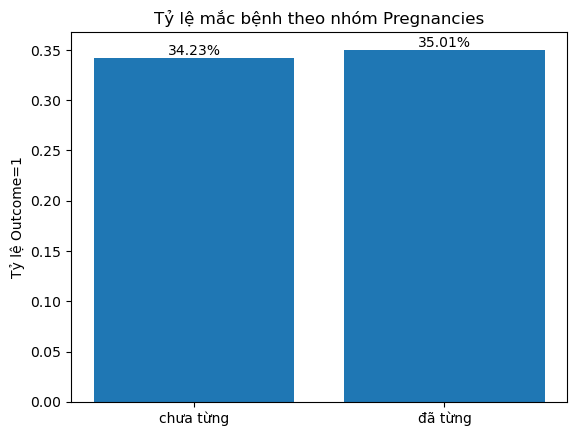

In [53]:
grp = np.where(pima_df["Pregnancies"]==0, "chưa từng", "đã từng")

rates = pima_df.groupby(grp)["Outcome"].mean()

print(rates) 

plt.bar(rates.index, rates.values)
plt.ylabel("Tỷ lệ Outcome=1")
plt.title("Tỷ lệ mắc bệnh theo nhóm Pregnancies")
for x, y in zip(rates.index, rates.values):
    plt.text(x, y, f"{y:.2%}", ha="center", va="bottom")
plt.show()


**Nhận xét:**
- Tỷ lệ mắc bệnh giữa nhóm chưa từng mang thai và đã từng mang thai gần như tương đương, cho thấy không có khác biệt đáng kể ở mức mô tả. Kết quả này có thể bị ảnh hưởng bởi yếu tố nhiễu như tuổi và cách gộp nhóm.

4) Độ tuổi nào thì sẽ có tỷ lệ mắc bệnh cao?

         rate_%    n
AgeBand             
21–24.9   14.16  219
25–29.9   29.94  177
30–34.9   45.65   92
35–39.9   46.58   73
≥40       52.17  207
Nhóm tuổi có tỷ lệ cao nhất: ≥40 (52.17%)


C:\Users\luong\AppData\Local\Temp\ipykernel_21620\916379159.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = (pima_df.assign(AgeBand=age_band).groupby("AgeBand")["Outcome"].agg(rate="mean", n="count"))


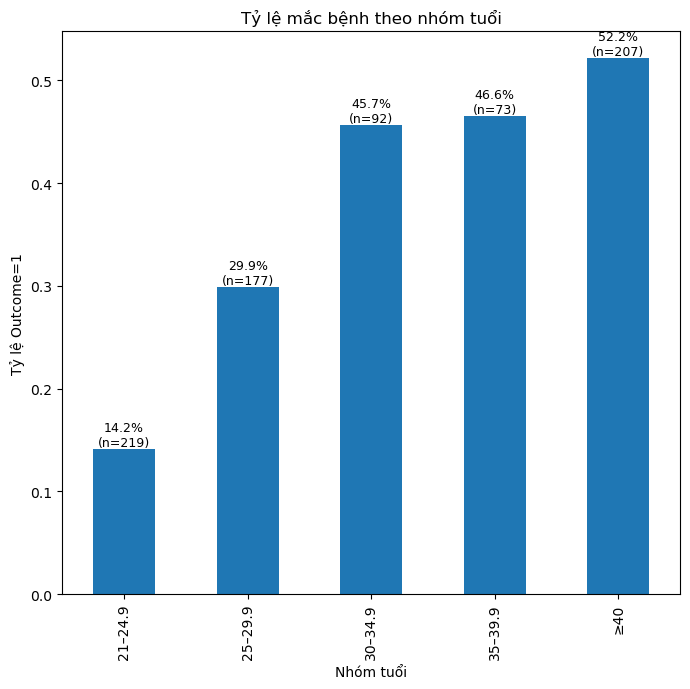

In [54]:
bins   = [21,25,30,35,40,100]
labels = ["21–24.9","25–29.9","30–34.9","35–39.9","≥40"]
age_band = pd.cut(pima_df["Age"], bins=bins, labels=labels, right=False, include_lowest= True)

rate = (pima_df.assign(AgeBand=age_band).groupby("AgeBand")["Outcome"].agg(rate="mean", n="count"))
# assign is creating one tempolary column of pima_df (Not original data)

print(rate.assign(rate= lambda d: (d["rate"]*100).round(2)).rename(columns={"rate":"rate_%"}))
top_band = rate["rate"].idxmax() # Take id of max value
top_rate = rate["rate"].max()
print(f"Nhóm tuổi có tỷ lệ cao nhất: {top_band} ({top_rate:.2%})")

ax = rate["rate"].plot(kind="bar", figsize=(7,7))
ax.set_ylabel("Tỷ lệ Outcome=1")
ax.set_xlabel("Nhóm tuổi")
ax.set_title("Tỷ lệ mắc bệnh theo nhóm tuổi")
for i, v in enumerate(rate["rate"].values):
    ax.text(i, v, f"{v:.1%}\n(n={rate['n'].iloc[i]})", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()


**Nhận xét:** 
- Dễ dàng thấy được các nhóm tuổi từ 30 trở đi tỷ lệ mắc bệnh cao.
- Trong khi đó thì với mức tuổi 25-29 cũng khá cao.

# Kết Thúc